In [1]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
def create_dataset(signal_data, look_back=1):  # 이전 수치를 통해 다음 수치를 예측, 1: 이전 수치 1개를 참고함.
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [3]:
# 기초 기술
look_back = 1
train_1 = np.array([1, 2, 3, 4, 5])
train_1 = train_1.reshape(5, 1)
x_train_1, y_train_1 = create_dataset(train_1, look_back)
print(x_train_1)
print('-----------------------')
print(y_train_1)
print('-----------------------')
train_1 = np.array([1, 2, 3, 4, 5])
x_train = np.reshape(x_train_1, (x_train_1.shape[0], x_train_1.shape[1], 1))  # 3차원 4면 1행 1열로 변경
print(x_train)
print('-----------------------')
train_1 = np.array([1, 2, 3, 4, 5])
train_1 = train_1.reshape(5, 1)
train_1 = np.squeeze(train_1)
print(train_1)
print('-----------------------')
x_train = np.squeeze(x_train)
print(x_train)
print('-----------------------')
for i in range(2):
    print(i)
print('-----------------------')    
a1 = np.ones((2, 3))
print(a1)
a2 = np.zeros((2, 2))
print(a2)
a12 = np.hstack([a1, a2])
print(a12)

[[1]
 [2]
 [3]
 [4]]
-----------------------
[2 3 4 5]
-----------------------
[[[1]]

 [[2]]

 [[3]]

 [[4]]]
-----------------------
[1 2 3 4 5]
-----------------------
[1 2 3 4]
-----------------------
0
1
-----------------------
[[ 1.  1.  1.]
 [ 1.  1.  1.]]
[[ 0.  0.]
 [ 0.  0.]]
[[ 1.  1.  1.  0.  0.]
 [ 1.  1.  1.  0.  0.]]


In [4]:
look_back = 40

# 1. 데이터셋 생성하기
signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

# 데이터 전처리, 0 ~ 1 사이의 값으로 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(signal_data)


In [5]:
# 데이터 분리
train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

# 데이터셋 생성
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

# 데이터셋 전처리
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [6]:
# 2. 모델 구성하기
model = Sequential()
model.add(LSTM(32, input_shape=(None, 1)))
model.add(Dropout(0.3))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adam')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val))


Train on 760 samples, validate on 360 samples
Epoch 1/100
760/760 [==============================] - 1s 2ms/step - loss: 0.1458 - val_loss: 0.0382
Epoch 2/100
760/760 [==============================] - 1s 812us/step - loss: 0.0415 - val_loss: 0.0215
Epoch 3/100
760/760 [==============================] - 1s 857us/step - loss: 0.0260 - val_loss: 0.0137
Epoch 4/100
760/760 [==============================] - 1s 863us/step - loss: 0.0206 - val_loss: 0.0069
Epoch 5/100
760/760 [==============================] - 1s 813us/step - loss: 0.0150 - val_loss: 0.0028
Epoch 6/100
760/760 [==============================] - 1s 821us/step - loss: 0.0094 - val_loss: 0.0019
Epoch 7/100
760/760 [==============================] - 1s 895us/step - loss: 0.0093 - val_loss: 9.2169e-04
Epoch 8/100
760/760 [==============================] - 1s 919us/step - loss: 0.0086 - val_loss: 0.0011
Epoch 9/100
760/760 [==============================] - 1s 965us/step - loss: 0.0068 - val_loss: 9.7224e-04
Epoch 10/100
760/760 

760/760 [==============================] - 1s 1ms/step - loss: 0.0035 - val_loss: 1.1024e-04
Epoch 78/100
760/760 [==============================] - 1s 905us/step - loss: 0.0029 - val_loss: 3.4180e-04
Epoch 79/100
760/760 [==============================] - 1s 891us/step - loss: 0.0029 - val_loss: 1.6452e-04
Epoch 80/100
760/760 [==============================] - 1s 902us/step - loss: 0.0025 - val_loss: 7.2234e-05
Epoch 81/100
760/760 [==============================] - 1s 947us/step - loss: 0.0030 - val_loss: 4.4204e-05
Epoch 82/100
760/760 [==============================] - 1s 928us/step - loss: 0.0027 - val_loss: 7.6222e-04
Epoch 83/100
760/760 [==============================] - 1s 949us/step - loss: 0.0031 - val_loss: 1.7190e-04
Epoch 84/100
760/760 [==============================] - 1s 822us/step - loss: 0.0027 - val_loss: 8.3355e-05
Epoch 85/100
760/760 [==============================] - 1s 879us/step - loss: 0.0028 - val_loss: 3.1876e-05
Epoch 86/100
760/760 [=====================

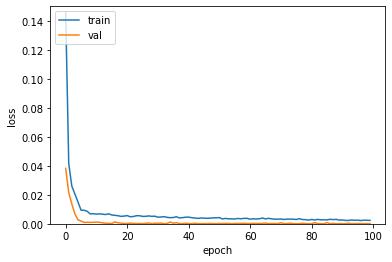

In [7]:
# 5. 학습과정 살펴보기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [8]:
# 6. 모델 평가하기
trainScore = model.evaluate(x_train, y_train, verbose=0)
model.reset_states()
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, verbose=0)
model.reset_states()
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

Train Score:  0.000136776483468
Validataion Score:  0.000136234703112
Test Score:  0.000136234703112


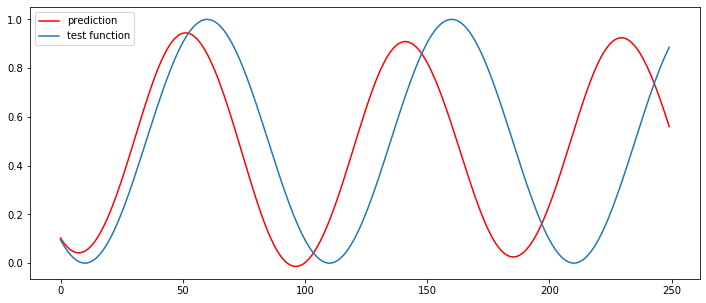

In [9]:
# 7. 모델 사용하기
look_ahead = 250
xhat = x_test[0]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:],prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="test function")
plt.legend()
plt.show()